# Event Plotting for CNN mPMT

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [3]:
print(os.getcwd())
sys.path.append('/home/hlahiouel/WatChMaL')

/home/hlahiouel/WatChMaL_analysis/Physics_Samples_Analysis


In [4]:
from watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset import CNNmPMTDataset

In [5]:
def channel_to_position(channel):
    channel = channel % 19 
    theta = (channel<12)*2*np.pi*channel/12 + ((channel >= 12) & (channel<18))*2*np.pi*(channel-12)/6
    radius = 0.2*(channel<18)+0.2*(channel<12)
    position = [radius*np.cos(theta), radius*np.sin(theta)] # note this is [y, x] or [row, column]
    return position

In [6]:
def plot_event(data, mpmt_pos, old_convention=False, **plot_args):
    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111)
    mpmts = ax.scatter(mpmt_pos[:, 1], mpmt_pos[:, 0], s=380, facecolors='none', edgecolors='0.9')
    indices = np.indices(data.shape)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), s=3, **plot_args)
    plt.colorbar(pmts)

In [7]:
def plot_event(data, mpmt_pos, old_convention=False, title=None, style="default", cmap=plt.cm.jet):
    #map = copy.copy(cmap)
    if style=="dark_background":
        edgecolors='0.2'
        cmap.set_bad(color='black')
    else:
        edgecolors='0.9'
        cmap.set_bad(color='white')
    data[data==0] = np.nan
    indices = np.indices(data.shape)
    #print(indices)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    with plt.style.context(style):
        fig = plt.figure(figsize=(20,12))
        ax = fig.add_subplot(111)
        mpmts = ax.scatter(mpmt_pos[:, 1], mpmt_pos[:, 0], s=380, facecolors='none', edgecolors=edgecolors)
        pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), s=3, cmap=cmap)
        plt.colorbar(pmts)
    if title is not None:
        ax.set_title(title)

## Testing with Physics Samples

### Loading data and using a test event 

In [8]:
dataset_short = CNNmPMTDataset(h5file='/home/hlahiouel/physics_samples/h5_files/physics_samples_test_update_mar31.h5',
                         mpmt_positions_file='/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz',
                         is_distributed=False)

(memmap([1008, 2542, 1771, ..., 7232, 3697, 9257], dtype=int16), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))


<ipython-input-7-ba6d98eeb61e>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color='black')


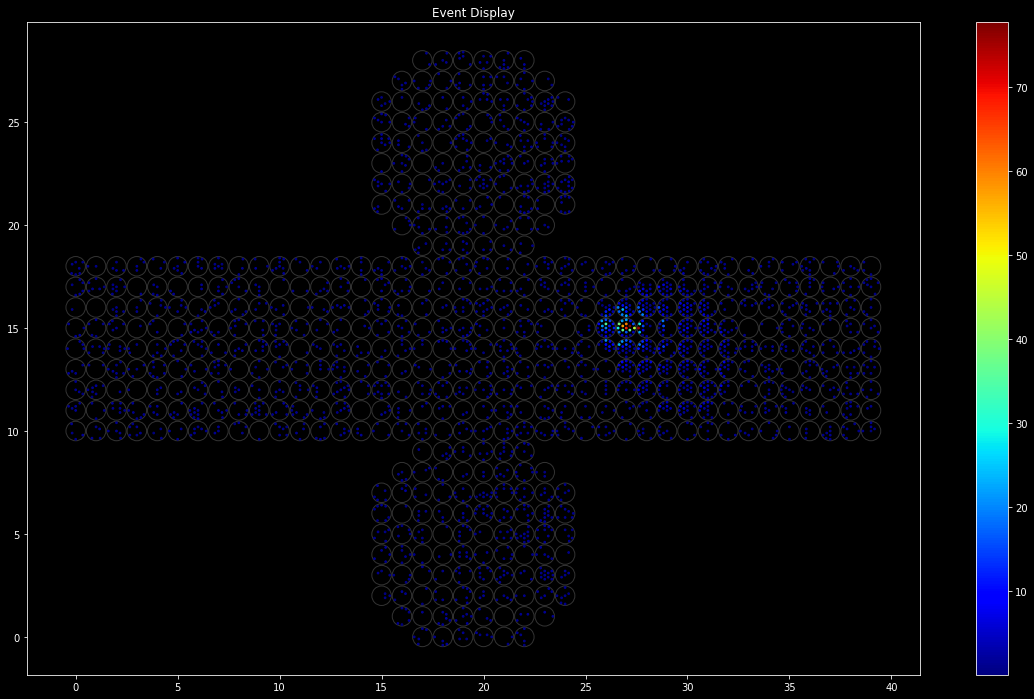

In [9]:
data_short = dataset_short.__getitem__(3)['data']
event_data = dataset_short.retrieve_event_data(3)
print(event_data)
plot_event(data_short, dataset_short.mpmt_positions, cmap=plt.cm.jet, title="Event Display", style="dark_background")

## Testing with Short Tank Data

In [ ]:
dataset_short = CNNmPMTDataset(h5file='/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5',
                         mpmt_positions_file='/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz',
                         is_distributed=False)

In [ ]:
for j in range(0,10):
    data_short = dataset_short.__getitem__(j)['data']
    plot_event(data_short, dataset_short.mpmt_positions, cmap=plt.cm.jet, title=["Event",j],style="dark_background")

### Test plots of x, y and z position values of each PMT

In [ ]:
geo_file_short = np.load("/fast_scratch/WatChMaL/data/geo_mPMTshort.npz", 'r')
geo_positions_short = geo_file_short["position"]
pmt_ids_short = np.arange(geo_positions_short.shape[0])
data_x_short = dataset_short.process_data(pmt_ids_short, geo_positions_short[:,0])
data_y_short = dataset_short.process_data(pmt_ids_short, geo_positions_short[:,1])
data_z_short = dataset_short.process_data(pmt_ids_short, geo_positions_short[:,2])

In [ ]:
# use color map with zero set to white so that non-physical mPMT locations don't show
plot_event(data_x_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_y_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_z_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)

### Test plots of x, y and z positions of each PMT relative to central PMT of the mPMT module

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.scatter(geo_positions_short[-19:,2],geo_positions_short[-19:,0], alpha=0)
for i, pos in zip(pmt_ids_short[-19:], geo_positions_short[-19:]):
    ax.text(pos[2],pos[0],i%19, ha="center", va="center")

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
test_positions_short = np.array(channel_to_position(pmt_ids_short[-19:])).T
ax.scatter(test_positions_short[:,1], test_positions_short[:,0], alpha=0)
for i, pos in zip(pmt_ids_short[-19:], test_positions_short):
    ax.text(pos[1],pos[0],i%19, ha="center", va="center")

In [ ]:
geo_positions_offset_short = geo_positions_short[pmt_ids_short] - geo_positions_short[(pmt_ids_short//19)*19+18]
data_x_short = dataset_short.process_data(pmt_ids_short, geo_positions_offset_short[:,0])
data_y_short = dataset_short.process_data(pmt_ids_short, geo_positions_offset_short[:,1])
data_z_short = dataset_short.process_data(pmt_ids_short, geo_positions_offset_short[:,2])
# use color map with zero set to white so that non-physical mPMT locations don't show
plot_event(data_x_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_y_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_z_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)

### Test plots of x, y and z orientation values of each PMT

In [ ]:
geo_orientations_short = geo_file_short["orientation"]
data_ox_short = dataset_short.process_data(pmt_ids_short, geo_orientations_short[:,0])
data_oy_short = dataset_short.process_data(pmt_ids_short, geo_orientations_short[:,1])
data_oz_short = dataset_short.process_data(pmt_ids_short, geo_orientations_short[:,2])
# use color map with zero set to white so that non-physical mPMT locations don't show
plot_event(data_ox_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_oy_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)
plot_event(data_oz_short, dataset_short.mpmt_positions, cmap=plt.cm.bwr)